In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as pl

In [ ]:
nx.from_pandas_adjacency()

In [29]:
d_causal = 

In [33]:
d_causal = d_causal.append(pd.DataFrame({'from':['X', 'Z'], 'to':['Z', 'Y'],
                                         'type': ['pipe'] * 2}))

In [34]:
d_causal = d_causal.append(pd.DataFrame())

,from,to,type
0,Z,X,fork
1,Z,Y,fork
0,X,Z,pipe
1,Z,Y,pipe


In [37]:
d_fork = pd.DataFrame({ 'from':['Z']*2, 'to':['X', 'Y'], 'type': ['fork'] * 2})
d_pipe = pd.DataFrame({'from':['X', 'Z'], 'to':['Z', 'Y'], 'type': ['pipe']*2})
d_coll = pd.DataFrame({'from':['X','Y'], 'to': ['Z']*2, 'type': ['collider']*2})
d_desc = pd.DataFrame({'from':['X', 'Z', 'Z'], 'to': ['Z', 'Y', 'A'], 'type': ['descendant']*3})
d_causal  = d_fork.copy()
d_causal = d_causal.append(d_pipe)
d_causal = d_causal.append(d_coll)
d_causal = d_causal.append(d_desc)

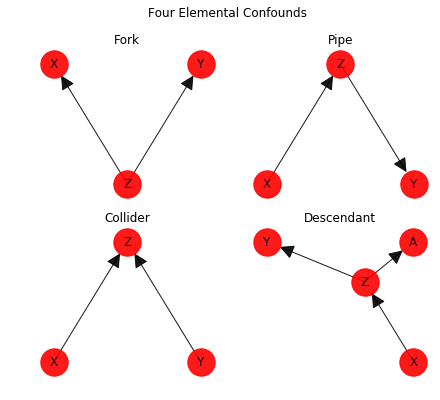

In [59]:
f_, ax = pl.subplots(ncols=2, nrows=2, figsize=(7, 6))
axs = ax.ravel()
for ax_, type_ in zip(axs, d_causal.type.unique()):
    G = nx.from_pandas_edgelist(d_causal.loc[d_causal.type==type_, ['from', 'to']],
                                'from', 'to', create_using=nx.DiGraph())
    nx.draw_spectral(G, with_labels=True, node_size=750, alpha=0.9,
                 arrows=True, ax=ax_, arrowsize=30)
    ax_.set_title(type_.capitalize())
f_.suptitle('Four Elemental Confounds');

<u>Fork</u>: 
* Z is a common cause of X and Y.
* De-confounding: conditioning on Z removes dependency b/w X and Y
    * $X \perp \!\!\! \perp  Y | Z$
    
<u>Pipe (Mediator)</u>:
* Z mediates association b/w X and Y
* X causes Z causes Y
* Deconfounding: conditioning on Z removes dependency b/w X and Y:
    * $X \perp \!\!\! \perp Y | Z$
* ***Data do not distinguish PIPES from FORKS!***
